In [1]:
##Name: Ruichao Ma
##USCID: 7007889679

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

data = pd.read_csv('../data/vertebral_column_data/column_2C.dat',sep="\s+", header = None)
print(data)

         0      1      2      3       4      5   6
0    63.03  22.55  39.61  40.48   98.67  -0.25  AB
1    39.06  10.06  25.02  29.00  114.41   4.56  AB
2    68.83  22.22  50.09  46.61  105.99  -3.53  AB
3    69.30  24.65  44.31  44.64  101.87  11.21  AB
4    49.71   9.65  28.32  40.06  108.17   7.92  AB
5    40.25  13.92  25.12  26.33  130.33   2.23  AB
6    53.43  15.86  37.17  37.57  120.57   5.99  AB
7    45.37  10.76  29.04  34.61  117.27 -10.68  AB
8    43.79  13.53  42.69  30.26  125.00  13.29  AB
9    36.69   5.01  41.95  31.68   84.24   0.66  AB
10   49.71  13.04  31.33  36.67  108.65  -7.83  AB
11   31.23  17.72  15.50  13.52  120.06   0.50  AB
12   48.92  19.96  40.26  28.95  119.32   8.03  AB
13   53.57  20.46  33.10  33.11  110.97   7.04  AB
14   57.30  24.19  47.00  33.11  116.81   5.77  AB
15   44.32  12.54  36.10  31.78  124.12   5.42  AB
16   63.83  20.36  54.55  43.47  112.31  -0.62  AB
17   31.28   3.14  32.56  28.13  129.01   3.62  AB
18   38.70  13.44  31.00  25.25

In [4]:
data.columns =['pelvic incidence','pelvic tilt','lumbar lordosis angle','sacral slope','pelvic radius','grade of spondylolisthesis','classes']
data.classes[data.classes == 'NO'] = 0
data.classes[data.classes == 'AB'] = 1


print(data)


     pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0               63.03        22.55                  39.61         40.48   
1               39.06        10.06                  25.02         29.00   
2               68.83        22.22                  50.09         46.61   
3               69.30        24.65                  44.31         44.64   
4               49.71         9.65                  28.32         40.06   
5               40.25        13.92                  25.12         26.33   
6               53.43        15.86                  37.17         37.57   
7               45.37        10.76                  29.04         34.61   
8               43.79        13.53                  42.69         30.26   
9               36.69         5.01                  41.95         31.68   
10              49.71        13.04                  31.33         36.67   
11              31.23        17.72                  15.50         13.52   
12              48.92    

C:\Users\Ruich\OneDrive\Pictures\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ruich\OneDrive\Pictures\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


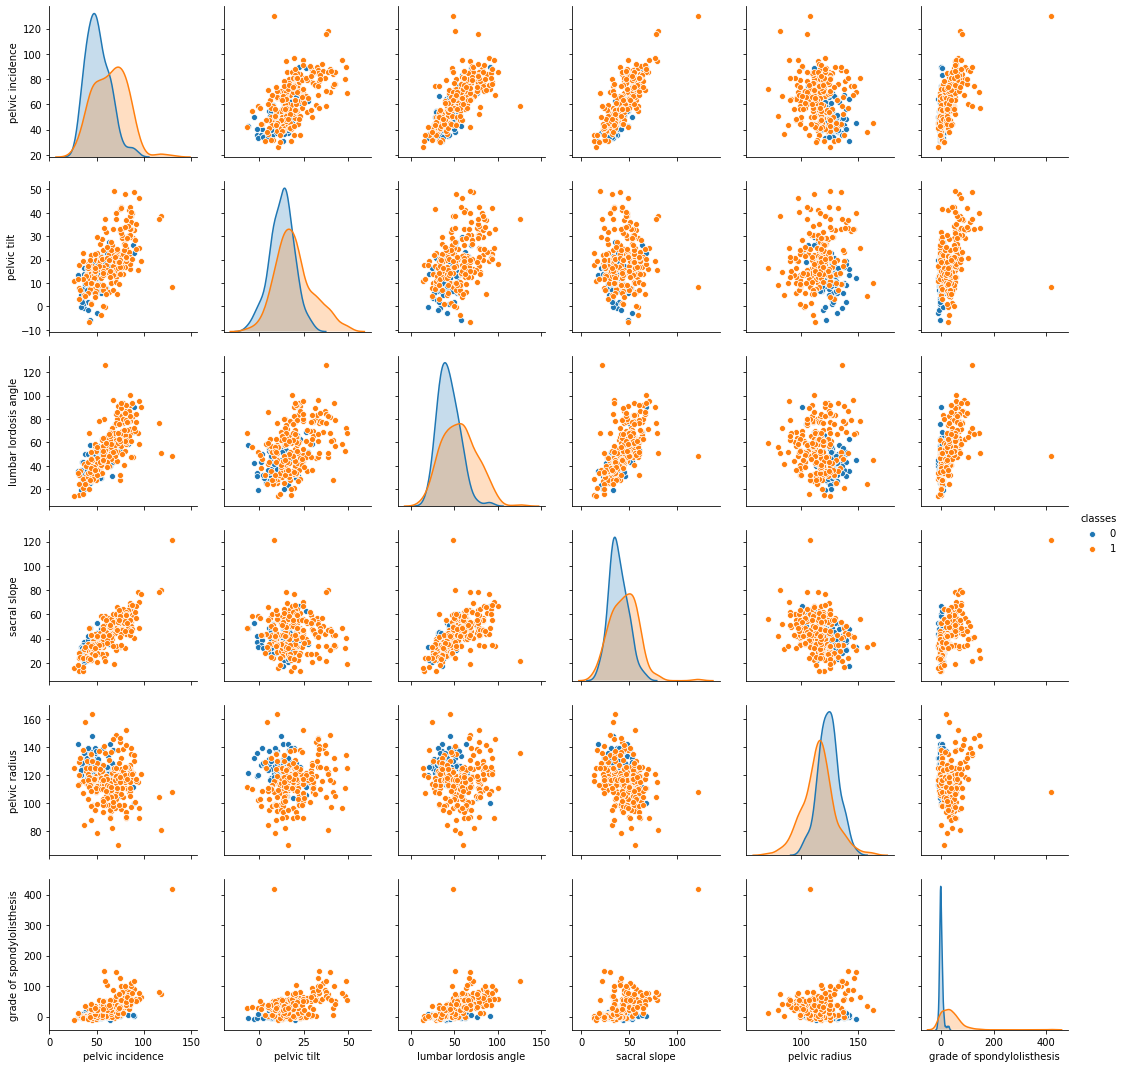

In [5]:
##b(i)
sns.pairplot(data,hue='classes',vars = data.columns[:-1])


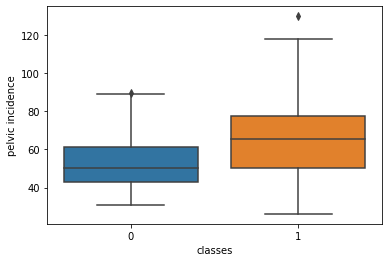

In [6]:
##b(ii)
sns.boxplot(x="classes", y="pelvic incidence",data=data)

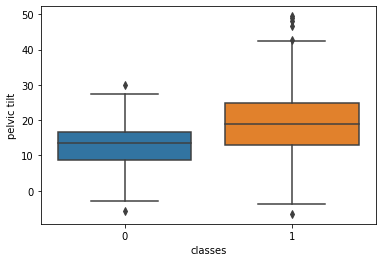

In [7]:
sns.boxplot(x="classes", y="pelvic tilt",data=data)

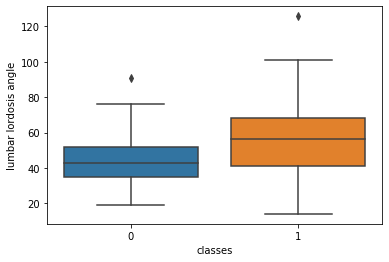

In [8]:
sns.boxplot(x="classes", y="lumbar lordosis angle",data=data)

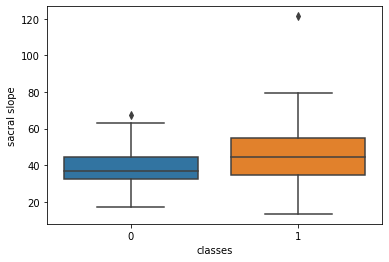

In [9]:
sns.boxplot(x="classes", y="sacral slope",data=data)

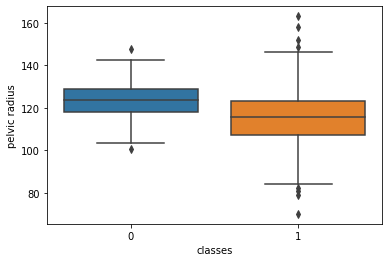

In [10]:
sns.boxplot(x="classes", y="pelvic radius",data=data)

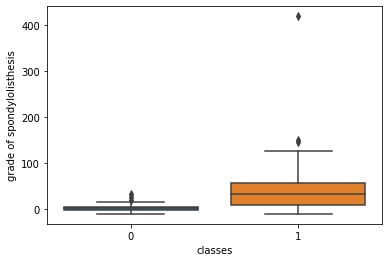

In [11]:
sns.boxplot(x="classes", y="grade of spondylolisthesis",data=data)

In [12]:
##b(iii)
##setting training data
ab_training = data[data['classes']==1]
ab_training = ab_training[0:140]
no_training = data[data['classes']==0]
no_training = no_training[0:70]
training = pd.concat([no_training,ab_training])

##setting test data
ab_testing = data[data['classes']==1]
ab_testing = ab_testing[140:]
no_testing = data[data['classes']==0]
no_testing = no_testing[70:]
testing = pd.concat([no_testing,ab_testing])
training.reset_index(drop=True,inplace=True)
testing.reset_index(drop=True,inplace=True)

In [13]:
##c(i)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances

X_training = np.array(training[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']])
Y_training = np.array(training['classes'])
Y_training = Y_training.astype('int')
X_testing = np.array(testing[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']])
Y_testing = np.array(testing['classes'])
Y_testing = Y_testing.astype('int')
##Below is instance which I use coding for k-nearest neighbors with Euclidean metric
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_training, Y_training)
pred_test = knn.predict(X_testing)
testing_error = 1 - accuracy_score(Y_testing, pred_test)
print(testing_error)

0.09999999999999998


In [14]:
##c(i)&c(ii)
##Actually, I think I merge codes of c(i)&c(ii),which I use function I write in c(i) to compute testing error in c(ii) with
##K=np.arange(208,0,-3)

X_training = np.array(training[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']])
Y_training = np.array(training['classes'])
Y_training = Y_training.astype('int')
X_testing = np.array(testing[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']])
Y_testing = np.array(testing['classes'])
Y_testing = Y_testing.astype('int')
k = np.arange(208,0,-3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_training, Y_training)
testing_error = {}
testing_error_list = []
training_error = {}
training_error_list = []
y_pred = knn.predict(X_testing)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_training, Y_training)
    pred_test = knn.predict(X_testing)
    pred_train = knn.predict(X_training)
    testing_error.update({i: 1 - accuracy_score(Y_testing, pred_test)})
    training_error.update({i: 1 - accuracy_score(Y_training, pred_train)})
    testing_error_list.append(1 - accuracy_score(Y_testing, pred_test))
    training_error_list.append(1 - accuracy_score(Y_training, pred_train))
    
    
    
testing_error

##By observing output of testing_error, we found that when k=4, testing error is smallest, it only has 0.06.So k=4 is most suitable


{208: 0.30000000000000004,
 205: 0.30000000000000004,
 202: 0.30000000000000004,
 199: 0.30000000000000004,
 196: 0.30000000000000004,
 193: 0.30000000000000004,
 190: 0.30000000000000004,
 187: 0.30000000000000004,
 184: 0.30000000000000004,
 181: 0.30000000000000004,
 178: 0.30000000000000004,
 175: 0.30000000000000004,
 172: 0.30000000000000004,
 169: 0.30000000000000004,
 166: 0.30000000000000004,
 163: 0.30000000000000004,
 160: 0.30000000000000004,
 157: 0.30000000000000004,
 154: 0.30000000000000004,
 151: 0.30000000000000004,
 148: 0.30000000000000004,
 145: 0.30000000000000004,
 142: 0.30000000000000004,
 139: 0.30000000000000004,
 136: 0.28,
 133: 0.27,
 130: 0.24,
 127: 0.22999999999999998,
 124: 0.19999999999999996,
 121: 0.21999999999999997,
 118: 0.15000000000000002,
 115: 0.19999999999999996,
 112: 0.16000000000000003,
 109: 0.16000000000000003,
 106: 0.14,
 103: 0.18000000000000005,
 100: 0.14,
 97: 0.16000000000000003,
 94: 0.15000000000000002,
 91: 0.16000000000000003

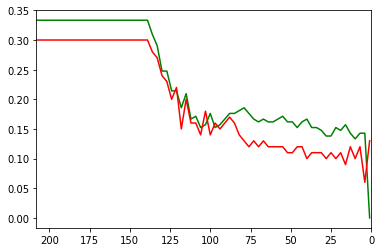

In [15]:
##Plotting train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, }
fig, lineplot = plt.subplots()
lineplot.plot(range(208, 0, -3)[::-1],training_error_list[::-1],color='green')
lineplot.set_xlim(208, 0, -3)
lineplot.plot(range(208, 0, -3)[::-1],testing_error_list[::-1],color='red')

In [16]:
## Still c(ii)
##calculate confusion matrix
from sklearn.metrics import confusion_matrix
knns = KNeighborsClassifier(n_neighbors=4)
knns.fit(X_training, Y_training)
y_preds = knns.predict(X_testing)

confusion = confusion_matrix(Y_testing, y_preds)
confusion

array([[25,  5],
       [ 1, 69]], dtype=int64)

In [17]:
##calculate true positive rate
tn, fp, fn, tp = confusion_matrix(Y_testing, y_preds).ravel()

true_positive_rate = tp/(confusion[1,0] + confusion[1,1])
true_positive_rate


0.9857142857142858

In [18]:
##calculate true negative rate
true_negative_rate = tn/(confusion[0,0] + confusion[0,1])
true_negative_rate

0.8333333333333334

In [19]:
##calculate precision
precision = tp/(confusion[0,1] + confusion[1,1])
precision

0.9324324324324325

In [20]:
##calculate F1 score
f_score = (2*tp)/(2*tp+fp+fn)
f_score

0.9583333333333334

In [21]:
##c(iii)
N=np.arange(10,212,10)
best_test_error = {}
for i in N:
    error_test = []
    selected_training = pd.concat([training[0:int(round(i/3))], training[70:70+int(round(2*i/3))]])
    feature_selected_training = np.array(selected_training[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']])
    class_selected_training = np.array(selected_training['classes'])
    class_selected_training = class_selected_training.astype('int')
    for k in range(1, i, 5):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(feature_selected_training, class_selected_training)
        pred_test = knn.predict(X_testing)
        error_test.append(1- accuracy_score(Y_testing, pred_test))
    best_test_error.update({i: min(error_test)})
best_test_error

##By observing output below, when k=210. The test error is lowest, which is 0.07999999999999996
        
     

{10: 0.25,
 20: 0.18999999999999995,
 30: 0.21999999999999997,
 40: 0.25,
 50: 0.30000000000000004,
 60: 0.29000000000000004,
 70: 0.29000000000000004,
 80: 0.29000000000000004,
 90: 0.29000000000000004,
 100: 0.25,
 110: 0.21999999999999997,
 120: 0.17000000000000004,
 130: 0.16000000000000003,
 140: 0.14,
 150: 0.13,
 160: 0.13,
 170: 0.12,
 180: 0.09999999999999998,
 190: 0.08999999999999997,
 200: 0.08999999999999997,
 210: 0.07999999999999996}

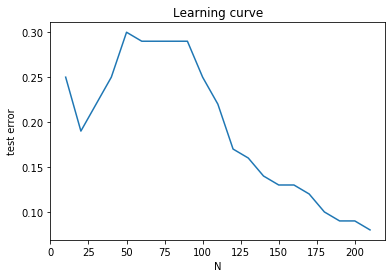

In [22]:
##plotting Learning curve
plt.plot(N,[0.25,
 0.18999999999999995,
 0.21999999999999997,
 0.25,
 0.30000000000000004,
 0.29000000000000004,
 0.29000000000000004,
 0.29000000000000004,
 0.29000000000000004,
 0.25,
 0.21999999999999997,
 0.17000000000000004,
 0.16000000000000003,
 0.14,
 0.13,
 0.13,
 0.12,
 0.09999999999999998,
 0.08999999999999997,
 0.08999999999999997,
 0.07999999999999996] )
plt.xlabel("N")
plt.ylabel("test error")
plt.title('Learning curve')
plt.show()

In [23]:
##d(i)A
K = np.arange(1,197,5)
testing_error = {}
for i in K:
    knn = KNeighborsClassifier(n_neighbors=i,p=1,metric='minkowski')
    knn.fit(X_training, Y_training)
    Y_pred = knn.predict(X_testing)
    testing_error.update({i: 1 - accuracy_score(Y_testing, Y_pred)})
testing_error
##By observing testing error list, we found that when k=6,11,26, test error is smallest. which is 0.10999999999999999

{1: 0.12,
 6: 0.10999999999999999,
 11: 0.10999999999999999,
 16: 0.12,
 21: 0.12,
 26: 0.10999999999999999,
 31: 0.12,
 36: 0.13,
 41: 0.13,
 46: 0.13,
 51: 0.14,
 56: 0.13,
 61: 0.15000000000000002,
 66: 0.15000000000000002,
 71: 0.14,
 76: 0.14,
 81: 0.16000000000000003,
 86: 0.15000000000000002,
 91: 0.19999999999999996,
 96: 0.19999999999999996,
 101: 0.21999999999999997,
 106: 0.20999999999999996,
 111: 0.22999999999999998,
 116: 0.20999999999999996,
 121: 0.21999999999999997,
 126: 0.24,
 131: 0.28,
 136: 0.28,
 141: 0.30000000000000004,
 146: 0.30000000000000004,
 151: 0.30000000000000004,
 156: 0.30000000000000004,
 161: 0.30000000000000004,
 166: 0.30000000000000004,
 171: 0.30000000000000004,
 176: 0.30000000000000004,
 181: 0.30000000000000004,
 186: 0.30000000000000004,
 191: 0.30000000000000004,
 196: 0.30000000000000004}

In [44]:
##d(i)B
P = []
testing_error = {}
for i in range(1,11,1):
    P.append(10**(i/10))
for i in P:
    knn = KNeighborsClassifier(n_neighbors=6,p=i,metric='minkowski')
    knn.fit(X_training, Y_training)
    Y_pred = knn.predict(X_testing)
    testing_error.update({i: 1 - accuracy_score(Y_testing, Y_pred)})
testing_error
##By observing test error list, when log10(p)=0.6. the test error is smallest, which is 0.06000000000000005

{1.2589254117941673: 0.08999999999999997,
 1.5848931924611136: 0.08999999999999997,
 1.9952623149688795: 0.07999999999999996,
 2.51188643150958: 0.07999999999999996,
 3.1622776601683795: 0.07999999999999996,
 3.9810717055349722: 0.06000000000000005,
 5.011872336272722: 0.06999999999999995,
 6.309573444801933: 0.07999999999999996,
 7.943282347242816: 0.08999999999999997,
 10.0: 0.08999999999999997}

In [25]:
##d(i)C
K = np.arange(1,197,5)
testing_error = {}

for i in K:
    knn = KNeighborsClassifier(n_neighbors=i,metric='chebyshev')
    knn.fit(X_training, Y_training)
    Y_pred = knn.predict(X_testing)
    testing_error.update({i: 1 - accuracy_score(Y_testing, Y_pred)})
    
testing_error
##By observing test error list, when k = 16, the test error is smallest, which is 0.07999999999999996

{1: 0.13,
 6: 0.09999999999999998,
 11: 0.12,
 16: 0.07999999999999996,
 21: 0.10999999999999999,
 26: 0.12,
 31: 0.12,
 36: 0.09999999999999998,
 41: 0.13,
 46: 0.12,
 51: 0.12,
 56: 0.12,
 61: 0.14,
 66: 0.13,
 71: 0.14,
 76: 0.10999999999999999,
 81: 0.14,
 86: 0.12,
 91: 0.15000000000000002,
 96: 0.14,
 101: 0.18999999999999995,
 106: 0.18000000000000005,
 111: 0.18000000000000005,
 116: 0.18000000000000005,
 121: 0.20999999999999996,
 126: 0.20999999999999996,
 131: 0.25,
 136: 0.28,
 141: 0.30000000000000004,
 146: 0.30000000000000004,
 151: 0.30000000000000004,
 156: 0.30000000000000004,
 161: 0.30000000000000004,
 166: 0.30000000000000004,
 171: 0.30000000000000004,
 176: 0.30000000000000004,
 181: 0.30000000000000004,
 186: 0.30000000000000004,
 191: 0.30000000000000004,
 196: 0.30000000000000004}

In [26]:
##d(ii)
K = np.arange(1,197,5)
testing_error = {}
cov_inverse = np.linalg.inv(np.cov(X_training))
for i in K:
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute',metric='mahalanobis',metric_params={'VI': cov_inverse})
    knn.fit(X_training, Y_training)
    Y_pred = knn.predict(X_testing)
    testing_error.update({i: 1 - accuracy_score(Y_testing, Y_pred)})
testing_error
##By observing test error list, when k = 11, the test error is smallest, which is 0.18999999999999995

{1: 0.32999999999999996,
 6: 0.20999999999999996,
 11: 0.18999999999999995,
 16: 0.24,
 21: 0.25,
 26: 0.20999999999999996,
 31: 0.21999999999999997,
 36: 0.21999999999999997,
 41: 0.25,
 46: 0.26,
 51: 0.27,
 56: 0.25,
 61: 0.24,
 66: 0.22999999999999998,
 71: 0.25,
 76: 0.26,
 81: 0.31000000000000005,
 86: 0.31000000000000005,
 91: 0.30000000000000004,
 96: 0.31000000000000005,
 101: 0.30000000000000004,
 106: 0.29000000000000004,
 111: 0.29000000000000004,
 116: 0.29000000000000004,
 121: 0.29000000000000004,
 126: 0.29000000000000004,
 131: 0.30000000000000004,
 136: 0.30000000000000004,
 141: 0.30000000000000004,
 146: 0.30000000000000004,
 151: 0.30000000000000004,
 156: 0.30000000000000004,
 161: 0.30000000000000004,
 166: 0.30000000000000004,
 171: 0.30000000000000004,
 176: 0.30000000000000004,
 181: 0.30000000000000004,
 186: 0.30000000000000004,
 191: 0.30000000000000004,
 196: 0.30000000000000004}

In [27]:
##e
##weighted voting with Euclidean
k = np.arange(1,197,5)
testing_error = {}
training_error = {} 
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(X_training, Y_training)
    Y_pred = knn.predict(X_testing)
    testing_error.update({i: 1 - accuracy_score(Y_testing, Y_pred)})
testing_error


##By observing test error list, when k= 6, the test error is smallest, which is 0.09999999999999998

{1: 0.13,
 6: 0.09999999999999998,
 11: 0.12,
 16: 0.10999999999999999,
 21: 0.10999999999999999,
 26: 0.10999999999999999,
 31: 0.10999999999999999,
 36: 0.10999999999999999,
 41: 0.10999999999999999,
 46: 0.10999999999999999,
 51: 0.10999999999999999,
 56: 0.10999999999999999,
 61: 0.10999999999999999,
 66: 0.10999999999999999,
 71: 0.10999999999999999,
 76: 0.12,
 81: 0.13,
 86: 0.13,
 91: 0.14,
 96: 0.14,
 101: 0.12,
 106: 0.14,
 111: 0.14,
 116: 0.13,
 121: 0.13,
 126: 0.13,
 131: 0.14,
 136: 0.14,
 141: 0.17000000000000004,
 146: 0.18999999999999995,
 151: 0.18999999999999995,
 156: 0.19999999999999996,
 161: 0.22999999999999998,
 166: 0.25,
 171: 0.27,
 176: 0.27,
 181: 0.27,
 186: 0.27,
 191: 0.28,
 196: 0.28}

In [28]:
##weighted voting with Manhattan
k = np.arange(1,197,5)
testing_error = {}
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance',metric='manhattan')
    knn.fit(X_training, Y_training)
    Y_pred = knn.predict(X_testing)
    testing_error.update({i: 1 - accuracy_score(Y_testing, Y_pred)})
testing_error
##By observing test error list, when k = 26, the test error is smallest, which is 0.09999999999999998

{1: 0.12,
 6: 0.10999999999999999,
 11: 0.10999999999999999,
 16: 0.12,
 21: 0.10999999999999999,
 26: 0.09999999999999998,
 31: 0.10999999999999999,
 36: 0.10999999999999999,
 41: 0.10999999999999999,
 46: 0.10999999999999999,
 51: 0.12,
 56: 0.12,
 61: 0.13,
 66: 0.13,
 71: 0.10999999999999999,
 76: 0.12,
 81: 0.14,
 86: 0.14,
 91: 0.13,
 96: 0.13,
 101: 0.15000000000000002,
 106: 0.15000000000000002,
 111: 0.15000000000000002,
 116: 0.15000000000000002,
 121: 0.15000000000000002,
 126: 0.15000000000000002,
 131: 0.15000000000000002,
 136: 0.16000000000000003,
 141: 0.17000000000000004,
 146: 0.18000000000000005,
 151: 0.18999999999999995,
 156: 0.20999999999999996,
 161: 0.24,
 166: 0.25,
 171: 0.27,
 176: 0.27,
 181: 0.27,
 186: 0.27,
 191: 0.28,
 196: 0.29000000000000004}

In [29]:
##weighted voting with Chebushev
k = np.arange(1,197,5)
testing_error = {}
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,metric='chebyshev',weights='distance')
    knn.fit(X_training, Y_training)
    Y_pred = knn.predict(X_testing)
    testing_error.update({i: 1 - accuracy_score(Y_testing, Y_pred)})
testing_error
##By observing test error list, when k = 16, the test error is smallest, which is 0.10999999999999999
##So best test error is 0.09999999999999998

{1: 0.13,
 6: 0.13,
 11: 0.12,
 16: 0.10999999999999999,
 21: 0.12,
 26: 0.12,
 31: 0.10999999999999999,
 36: 0.10999999999999999,
 41: 0.10999999999999999,
 46: 0.12,
 51: 0.12,
 56: 0.12,
 61: 0.10999999999999999,
 66: 0.13,
 71: 0.12,
 76: 0.12,
 81: 0.12,
 86: 0.14,
 91: 0.13,
 96: 0.14,
 101: 0.14,
 106: 0.14,
 111: 0.14,
 116: 0.14,
 121: 0.15000000000000002,
 126: 0.14,
 131: 0.16000000000000003,
 136: 0.16000000000000003,
 141: 0.18000000000000005,
 146: 0.18999999999999995,
 151: 0.20999999999999996,
 156: 0.20999999999999996,
 161: 0.22999999999999998,
 166: 0.26,
 171: 0.26,
 176: 0.26,
 181: 0.27,
 186: 0.27,
 191: 0.27,
 196: 0.28}

In [30]:
##f
##Repeated same procedure from Question c to Question e. Replace test error with train error.

##Below is same procedure as c(ii), I only replace test error with train error.
k = np.arange(208,0,-3)
training_error = {}

y_pred = knn.predict(X_testing)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_training, Y_training)
    pred_train = knn.predict(X_training)
    training_error.update({i: 1 - accuracy_score(Y_training, pred_train)})    
training_error

##Actually, in this step when k = 1, training error equals to 0.0, that is lowest error since training error cannot be smaller
##than zero. So we can conclude that lowest training error rate I achieve in this homework is 0.0.


{208: 0.33333333333333337,
 205: 0.33333333333333337,
 202: 0.33333333333333337,
 199: 0.33333333333333337,
 196: 0.33333333333333337,
 193: 0.33333333333333337,
 190: 0.33333333333333337,
 187: 0.33333333333333337,
 184: 0.33333333333333337,
 181: 0.33333333333333337,
 178: 0.33333333333333337,
 175: 0.33333333333333337,
 172: 0.33333333333333337,
 169: 0.33333333333333337,
 166: 0.33333333333333337,
 163: 0.33333333333333337,
 160: 0.33333333333333337,
 157: 0.33333333333333337,
 154: 0.33333333333333337,
 151: 0.33333333333333337,
 148: 0.33333333333333337,
 145: 0.33333333333333337,
 142: 0.33333333333333337,
 139: 0.33333333333333337,
 136: 0.30952380952380953,
 133: 0.29047619047619044,
 130: 0.24761904761904763,
 127: 0.24761904761904763,
 124: 0.2142857142857143,
 121: 0.2142857142857143,
 118: 0.18571428571428572,
 115: 0.20952380952380956,
 112: 0.16666666666666663,
 109: 0.17142857142857137,
 106: 0.1523809523809524,
 103: 0.15714285714285714,
 100: 0.17619047619047623,
 97:

In [31]:
##Below content probably is unnecessary since I have already get lowest training rate in this homework.
##Training error for c(iii)
N=np.arange(10,212,10)
best_train_error = {}
for i in N:
    error_train = []
    selected_training = pd.concat([training[0:int(round(i/3))], training[70:70+int(round(2*i/3))]])
    feature_selected_training = np.array(selected_training[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']])
    class_selected_training = np.array(selected_training['classes'])
    class_selected_training = class_selected_training.astype('int')
    for k in range(1, i, 5):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(feature_selected_training, class_selected_training)
        pred_train = knn.predict(X_training)
        error_train.append(1- accuracy_score(Y_training, pred_train))
    best_train_error.update({i: min(error_test)})
best_train_error

{10: 0.07999999999999996,
 20: 0.07999999999999996,
 30: 0.07999999999999996,
 40: 0.07999999999999996,
 50: 0.07999999999999996,
 60: 0.07999999999999996,
 70: 0.07999999999999996,
 80: 0.07999999999999996,
 90: 0.07999999999999996,
 100: 0.07999999999999996,
 110: 0.07999999999999996,
 120: 0.07999999999999996,
 130: 0.07999999999999996,
 140: 0.07999999999999996,
 150: 0.07999999999999996,
 160: 0.07999999999999996,
 170: 0.07999999999999996,
 180: 0.07999999999999996,
 190: 0.07999999999999996,
 200: 0.07999999999999996,
 210: 0.07999999999999996}

In [32]:
##Training error for d(i)A
K = np.arange(1,197,5)
training_error = {}
for i in K:
    knn = KNeighborsClassifier(n_neighbors=i,p=1,metric='minkowski')
    knn.fit(X_training, Y_training)
    pred_train = knn.predict(X_training)
    training_error.update({i: 1 - accuracy_score(Y_training, pred_train)})
training_error

{1: 0.0,
 6: 0.13809523809523805,
 11: 0.1428571428571429,
 16: 0.1333333333333333,
 21: 0.14761904761904765,
 26: 0.16666666666666663,
 31: 0.16666666666666663,
 36: 0.16190476190476188,
 41: 0.16666666666666663,
 46: 0.17142857142857137,
 51: 0.17142857142857137,
 56: 0.18571428571428572,
 61: 0.17619047619047623,
 66: 0.18095238095238098,
 71: 0.17619047619047623,
 76: 0.18095238095238098,
 81: 0.16666666666666663,
 86: 0.1523809523809524,
 91: 0.18095238095238098,
 96: 0.17619047619047623,
 101: 0.19999999999999996,
 106: 0.2047619047619048,
 111: 0.21904761904761905,
 116: 0.22857142857142854,
 121: 0.24285714285714288,
 126: 0.26190476190476186,
 131: 0.3047619047619048,
 136: 0.32380952380952377,
 141: 0.33333333333333337,
 146: 0.33333333333333337,
 151: 0.33333333333333337,
 156: 0.33333333333333337,
 161: 0.33333333333333337,
 166: 0.33333333333333337,
 171: 0.33333333333333337,
 176: 0.33333333333333337,
 181: 0.33333333333333337,
 186: 0.33333333333333337,
 191: 0.333333333

In [33]:
##Training error for d(i)B
P = []
train_error = {}
for i in range(1,11,1):
    P.append(10**(i/10))
for i in P:
    knn = KNeighborsClassifier(n_neighbors=26,p=i,metric='minkowski')
    knn.fit(X_training, Y_training)
    train_pred = knn.predict(X_training)
    train_error.update({i: 1 - accuracy_score(Y_training, train_pred)})
train_error

{1.2589254117941673: 0.16190476190476188,
 1.5848931924611136: 0.14761904761904765,
 1.9952623149688795: 0.1428571428571429,
 2.51188643150958: 0.13809523809523805,
 3.1622776601683795: 0.13809523809523805,
 3.9810717055349722: 0.13809523809523805,
 5.011872336272722: 0.1428571428571429,
 6.309573444801933: 0.14761904761904765,
 7.943282347242816: 0.14761904761904765,
 10.0: 0.1523809523809524}

In [34]:
##training error for d(i)C
K = np.arange(1,197,5)
train_error = {}

for i in K:
    knn = KNeighborsClassifier(n_neighbors=i,metric='chebyshev')
    knn.fit(X_training, Y_training)
    train_pred = knn.predict(X_training)
    train_error.update({i: 1 - accuracy_score(Y_training, train_pred)})
    
train_error

{1: 0.0,
 6: 0.1523809523809524,
 11: 0.1523809523809524,
 16: 0.14761904761904765,
 21: 0.1333333333333333,
 26: 0.15714285714285714,
 31: 0.1428571428571429,
 36: 0.1523809523809524,
 41: 0.1428571428571429,
 46: 0.16190476190476188,
 51: 0.16666666666666663,
 56: 0.16666666666666663,
 61: 0.17142857142857137,
 66: 0.16190476190476188,
 71: 0.18095238095238098,
 76: 0.17619047619047623,
 81: 0.17142857142857137,
 86: 0.17142857142857137,
 91: 0.16190476190476188,
 96: 0.16190476190476188,
 101: 0.17142857142857137,
 106: 0.17142857142857137,
 111: 0.18095238095238098,
 116: 0.17619047619047623,
 121: 0.20952380952380956,
 126: 0.2238095238095238,
 131: 0.24761904761904763,
 136: 0.319047619047619,
 141: 0.33333333333333337,
 146: 0.33333333333333337,
 151: 0.33333333333333337,
 156: 0.33333333333333337,
 161: 0.33333333333333337,
 166: 0.33333333333333337,
 171: 0.33333333333333337,
 176: 0.33333333333333337,
 181: 0.33333333333333337,
 186: 0.33333333333333337,
 191: 0.3333333333333

In [35]:
##training error for d(ii)
K = np.arange(1,197,5)
train_error = {}
cov_inverse = np.linalg.inv(np.cov(X_training))
for i in K:
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute',metric='mahalanobis',metric_params={'VI': cov_inverse})
    knn.fit(X_training, Y_training)
    train_pred = knn.predict(X_training)
    train_error.update({i: 1 - accuracy_score(Y_training, train_pred)})
train_error

{1: 0.0,
 6: 0.14761904761904765,
 11: 0.16666666666666663,
 16: 0.19047619047619047,
 21: 0.17142857142857137,
 26: 0.18095238095238098,
 31: 0.20952380952380956,
 36: 0.21904761904761905,
 41: 0.2142857142857143,
 46: 0.2571428571428571,
 51: 0.24285714285714288,
 56: 0.2761904761904762,
 61: 0.2666666666666667,
 66: 0.3047619047619048,
 71: 0.33333333333333337,
 76: 0.3571428571428571,
 81: 0.34285714285714286,
 86: 0.36190476190476195,
 91: 0.36190476190476195,
 96: 0.3476190476190476,
 101: 0.33333333333333337,
 106: 0.3380952380952381,
 111: 0.3380952380952381,
 116: 0.34285714285714286,
 121: 0.34285714285714286,
 126: 0.3380952380952381,
 131: 0.33333333333333337,
 136: 0.33333333333333337,
 141: 0.33333333333333337,
 146: 0.33333333333333337,
 151: 0.33333333333333337,
 156: 0.33333333333333337,
 161: 0.33333333333333337,
 166: 0.33333333333333337,
 171: 0.33333333333333337,
 176: 0.33333333333333337,
 181: 0.33333333333333337,
 186: 0.33333333333333337,
 191: 0.33333333333333

In [36]:
##training error for e
k = np.arange(1,197,5)
training_error = {} 
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(X_training, Y_training)
    train_pred = knn.predict(X_training)
    training_error.update({i: 1 - accuracy_score(Y_training, train_pred)})
training_error

{1: 0.0,
 6: 0.0,
 11: 0.0,
 16: 0.0,
 21: 0.0,
 26: 0.0,
 31: 0.0,
 36: 0.0,
 41: 0.0,
 46: 0.0,
 51: 0.0,
 56: 0.0,
 61: 0.0,
 66: 0.0,
 71: 0.0,
 76: 0.0,
 81: 0.0,
 86: 0.0,
 91: 0.0,
 96: 0.0,
 101: 0.0,
 106: 0.0,
 111: 0.0,
 116: 0.0,
 121: 0.0,
 126: 0.0,
 131: 0.0,
 136: 0.0,
 141: 0.0,
 146: 0.0,
 151: 0.0,
 156: 0.0,
 161: 0.0,
 166: 0.0,
 171: 0.0,
 176: 0.0,
 181: 0.0,
 186: 0.0,
 191: 0.0,
 196: 0.0}

In [37]:
k = np.arange(1,197,5)
training_error = {} 
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance',metric='manhattan')
    knn.fit(X_training, Y_training)
    train_pred = knn.predict(X_training)
    training_error.update({i: 1 - accuracy_score(Y_training, train_pred)})
training_error

{1: 0.0,
 6: 0.0,
 11: 0.0,
 16: 0.0,
 21: 0.0,
 26: 0.0,
 31: 0.0,
 36: 0.0,
 41: 0.0,
 46: 0.0,
 51: 0.0,
 56: 0.0,
 61: 0.0,
 66: 0.0,
 71: 0.0,
 76: 0.0,
 81: 0.0,
 86: 0.0,
 91: 0.0,
 96: 0.0,
 101: 0.0,
 106: 0.0,
 111: 0.0,
 116: 0.0,
 121: 0.0,
 126: 0.0,
 131: 0.0,
 136: 0.0,
 141: 0.0,
 146: 0.0,
 151: 0.0,
 156: 0.0,
 161: 0.0,
 166: 0.0,
 171: 0.0,
 176: 0.0,
 181: 0.0,
 186: 0.0,
 191: 0.0,
 196: 0.0}

In [38]:
k = np.arange(1,197,5)
training_error = {} 
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance',metric='chebyshev')
    knn.fit(X_training, Y_training)
    train_pred = knn.predict(X_training)
    training_error.update({i: 1 - accuracy_score(Y_training, train_pred)})
training_error

{1: 0.0,
 6: 0.0,
 11: 0.0,
 16: 0.0,
 21: 0.0,
 26: 0.0,
 31: 0.0,
 36: 0.0,
 41: 0.0,
 46: 0.0,
 51: 0.0,
 56: 0.0,
 61: 0.0,
 66: 0.0,
 71: 0.0,
 76: 0.0,
 81: 0.0,
 86: 0.0,
 91: 0.0,
 96: 0.0,
 101: 0.0,
 106: 0.0,
 111: 0.0,
 116: 0.0,
 121: 0.0,
 126: 0.0,
 131: 0.0,
 136: 0.0,
 141: 0.0,
 146: 0.0,
 151: 0.0,
 156: 0.0,
 161: 0.0,
 166: 0.0,
 171: 0.0,
 176: 0.0,
 181: 0.0,
 186: 0.0,
 191: 0.0,
 196: 0.0}

In [39]:
##Lowest training error in this homework is still 0.0